# Определение перспективного тарифа для телеком компании  

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов
### Тариф «Смарт»
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  
### Тариф «Ультра»
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных
#### Таблица users (информация о пользователях):  
<font color=#333ff>user_id</font> — уникальный идентификатор пользователя  
<font color=#333ff>first_name</font> — имя пользователя  
<font color=#333ff>last_name</font> — фамилия пользователя  
<font color=#333ff>age</font> — возраст пользователя (годы)  
<font color=#333ff>reg_date</font> — дата подключения тарифа (день, месяц, год)  
<font color=#333ff>churn_date</font> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
<font color=#333ff>city</font> — город проживания пользователя  
<font color=#333ff>tarif</font> — название тарифного плана  
#### Таблица calls (информация о звонках):  
<font color=#333ff>id</font> — уникальный номер звонка  
<font color=#333ff>call_date</font> — дата звонка  
<font color=#333ff>duration</font> — длительность звонка в минутах  
<font color=#333ff>user_id</font> — идентификатор пользователя, сделавшего звонок  
#### Таблица messages (информация о сообщениях):  
<font color=#333ff>id</font> — уникальный номер сообщения  
<font color=#333ff>message_date</font> — дата сообщения  
<font color=#333ff>user_id</font> — идентификатор пользователя, отправившего сообщение  
#### Таблица internet (информация об интернет-сессиях):  
<font color=#333ff>id</font> — уникальный номер сессии  
<font color=#333ff>mb_used</font> — объём потраченного за сессию интернет-трафика (в мегабайтах)  
<font color=#333ff>session_date</font> — дата интернет-сессии  
<font color=#333ff>user_id</font> — идентификатор пользователя  
#### Таблица tariffs (информация о тарифах):  
<font color=#333ff>tariff_name</font> — название тарифа  
<font color=#333ff>rub_monthly_fee</font> — ежемесячная абонентская плата в рублях  
<font color=#333ff>minutes_included</font> — количество минут разговора в месяц, включённых в абонентскую плату  
<font color=#333ff>messages_included</font> — количество сообщений в месяц, включённых в абонентскую плату  
<font color=#333ff>mb_per_month_included</font> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
<font color=#333ff>rub_per_minute</font> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
<font color=#333ff>rub_per_message</font> — стоимость отправки сообщения сверх тарифного пакета  
<font color=#333ff>rub_per_gb</font> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

## План исследования

1. Ознакомление с данными.  
2. Предобработка данных.  
    2.1 Определяем пропущенные значения.  
    2.2 Заполняем пропуски при необходимости.   
    2.3 Приводим данные к необходимым типам.  
    2.4 Считаем необходимые значения
3. Анализ данных  
    3.1 Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц     
    3.2 Среднее количество, дисперсию и стандартное отклонение
    3.3 Гистограммы
4. Проверка гипотез  
    4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  
    4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов   
5. Общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Загружаем данные

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Шаг 2. Изучаем общую информацию и приводим данные в порядок

#### Пойдём по порядку, начиная со звонков

In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков в данных нет. Необходимо изменить тип данных call_date - на datetime.

In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

##### Посмотрим на гистограмму распределения длительности звонков:

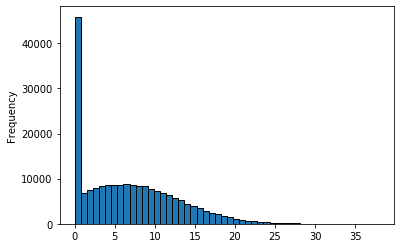

In [7]:
calls['duration'].plot(kind='hist', ec='black', bins=50)

##### Округлим звонки длительностью менее 1 минуты "вверх"

In [8]:
calls['duration'] = calls['duration'].apply(np.ceil)

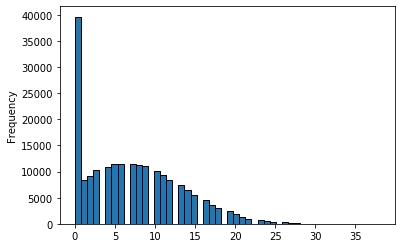

In [9]:
calls['duration'].plot(kind='hist', ec='black', bins=50)

##### Посмотрим на нулевые звонки

In [10]:
calls.query('duration == 0.0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Почти 20% данных. С одной стороны это много, а с другой -- надо понять влият ли они на конечные выводы. Пока оставим как есть.  
>**<span style="color:red">UPD!</span>** Поскольку нулевые звонки не принимают участия в формировании конечной выручки, удалим эти строки.

In [11]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

##### Таблица internet

In [12]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропусков в данных нет. Необходимо изменить тип данных в столбце session_date - на datetime.

In [14]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Так же как и в звонках округляем в большую сторону до мегабайта весь трафик по каждой сессии при помощи np.ceil:

In [15]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

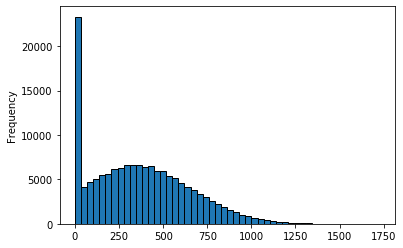

In [16]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

In [17]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


#### Вероятно, это интернет-сессии, когда подключение к интернету было включено, но ни одной операции произведено не было. Эти строки  исключим из датафрейма:

In [18]:
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

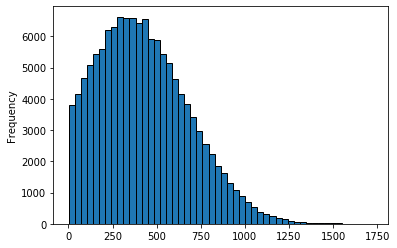

In [19]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

##### Таблица messages

In [20]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков в данных нет. Необходимо изменить тип данных в столбце message_date - на datetime.

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

##### Таблица tariffs

In [23]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Справочная таблица по тарифам.

>**<span style="color:red">UPD!</span>** Переименуем колонку с названием тарифа, чтобы в дальнейшем применить merge по ней.

In [24]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

##### Таблица users

In [25]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски только в столбце churn_date. В описании проекта сказано:
"churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)".
Значит оставим данные в этом столбце как есть - для решения поставленной задачи они нам не нужны.

Проверим пользователей на уникальность:

In [27]:
print("Число строк в датафрейме users:", users.shape[0])
print("Число уникальных пользователей:", users['user_id'].count())
print("Число дубликатов:", users.duplicated().sum())

Число строк в датафрейме users: 500
Число уникальных пользователей: 500
Число дубликатов: 0


Приведем даты в столбцах churn_date и reg_date к соответствующим форматам

In [28]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Напишем функцию, добавляющую столбец c месяцем 

In [29]:
def add_month(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'date' in column and column != 'churn_date':
                df['месяц'] = df[column].apply(lambda x: x.month)

In [30]:
add_month([users, calls, messages, internet])

In [31]:
users.head()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,месяц
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [32]:
messages.head()

,id,message_date,user_id,месяц
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [33]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,месяц
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9


In [34]:
calls.head()

,id,call_date,duration,user_id,месяц
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9


### Посчитаем значения, необходимые для анализа каждого пользователя

In [35]:
full_table = pd.DataFrame()

##### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [36]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [37]:
calls_month = calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [38]:
tmp_df = pd.DataFrame(calls_month.to_records())

In [39]:
full_table['user_id'] = tmp_df['user_id']
full_table['month']   = tmp_df['month']
full_table['calls']   = tmp_df.iloc[:, 2]
full_table['minutes'] = tmp_df.iloc[:, 3]

##### Количество отправленных сообщений по месяцам

In [40]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [41]:
messages_month = messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)

In [42]:
tmp_df = pd.DataFrame(messages_month.to_records()).rename(columns={'id': 'messages'})

In [43]:
full_table = full_table.merge(tmp_df, on=['user_id', 'month'], how='outer')

##### Объем израсходованного интернет-трафика по месяцам

In [44]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [45]:
internet_month = internet.pivot_table(
    index=['month', 'user_id'],
    values='mb_used',
    aggfunc='sum'
)

In [46]:
tmp_df = pd.DataFrame(internet_month.to_records())

In [47]:
full_table = full_table.merge(tmp_df, on=['user_id', 'month'], how='outer')

In [48]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3168 non-null float64
minutes     3168 non-null float64
messages    2717 non-null float64
mb_used     3201 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [49]:
full_table.head()

,user_id,month,calls,minutes,messages,mb_used
0,1005,1,11.0,95.0,7.0,2730.0
1,1032,1,44.0,380.0,38.0,24147.0
2,1045,1,1.0,9.0,5.0,2348.0
3,1055,1,47.0,551.0,30.0,17111.0
4,1071,1,18.0,194.0,16.0,15622.0


Таким образом, в одном датафрейме мы видим следующую информацию по пользователям в разрезе месяцев:
- количество сделанных звонков и израсходованных минут разговора;
- количество отправленных сообщений;
- объем израсходованного интернет-трафика в мегабайтах.
>После формирования датафрейма по месяцам появились пропуски. Вероятно, некоторые из пользователей за рассматриваемый период времени или ни разу не звонили, или ни разу не отправляли СМС, или ни разу не выходили в интернет. Например, кто-то пользовался только мобильным интернетом. Поэтому проставим по имеющимся пропускам нули, которые будут означать, что в конкретном месяце данный клиент не звонил/не отправлял СМС/не пользовался интернетом:

In [50]:
full_table = full_table.fillna(0)

In [51]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


При соединении датафреймов Pandas привел типы к float из-за пропусков, поэтому вернём их в int

In [52]:
to_int = ['calls', 'minutes', 'messages', 'mb_used']

for f in to_int:
    full_table[f] = full_table[f].fillna(0).astype('int64')

##### Помесячная выручка с каждого пользователя

In [53]:
#Добавим в датафрейм информацию о пользователях и тарифах
full_table = full_table.merge(users, on='user_id', how='left').merge(tariffs, on='tariff', how='left')

In [54]:
#Перерасход минут, сообщений и трафика посчитаем как разность между месячным значением и включенным в тариф
full_table['minutes_over']  = full_table['minutes'] - full_table['minutes_included']
full_table['messages_over'] = full_table['messages'] - full_table['messages_included']
full_table['mb_used_over']  = full_table['mb_used'] - full_table['mb_per_month_included']

In [55]:
full_table.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1005,1,11,95,7,2730,67,NaT,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,-405,-43,-12630
1,1032,1,44,380,38,24147,31,NaT,Ульяновск,Инна,...,50,15360,500,550,200,3,3,-120,-12,8787
2,1045,1,1,9,5,2348,48,NaT,Улан-Удэ,Джемма,...,50,15360,500,550,200,3,3,-491,-45,-13012
3,1055,1,47,551,30,17111,39,NaT,Казань,Луиза,...,50,15360,500,550,200,3,3,51,-20,1751
4,1071,1,18,194,16,15622,20,2018-08-31,Омск,Гектор,...,50,15360,500,550,200,3,3,-306,-34,262


 Положительные значения указывают на перерасход. Отрицательные на остаток в рамках тарифа.

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножим на значение из тарифного плана.

In [56]:
def month_revenue(row):
    add_minute = 0
    add_message = 0
    add_mb_used = 0
    
    # стоимость дополнительных минут
    if row['minutes_over'] > 0:
        add_minute = row['minutes_over'] * row['rub_per_minute']

    # стоимость дополнительных сообщений
    if row['messages_over'] > 0:
        add_message = row['messages_over'] * row['rub_per_message']

    # стоимость дополнительного трафика
    if row['mb_used_over'] > 0:
        add_mb_used = np.ceil(row['mb_used_over']/1024) * row['rub_per_gb']
 
        
    
    return add_minute + add_message + add_mb_used

In [57]:
full_table['rub_monthly_fee_over'] = full_table.apply(month_revenue, axis=1)
full_table['rub_monthly_fee_total'] = full_table['rub_monthly_fee'] + full_table['rub_monthly_fee_over']

In [58]:
# Датафрейм только с нужными нами данными
full_table = pd.DataFrame(
    full_table[['month', 'tariff', 'user_id', 'city',
           'calls', 'minutes', 'messages', 'mb_used',
           'minutes_over', 'messages_over', 'mb_used_over',
           'rub_monthly_fee_over', 'rub_monthly_fee_total']]
)

In [59]:
full_table.head()

,month,tariff,user_id,city,calls,minutes,messages,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
0,1,smart,1005,Набережные Челны,11,95,7,2730,-405,-43,-12630,0.0,550.0
1,1,smart,1032,Ульяновск,44,380,38,24147,-120,-12,8787,1800.0,2350.0
2,1,smart,1045,Улан-Удэ,1,9,5,2348,-491,-45,-13012,0.0,550.0
3,1,smart,1055,Казань,47,551,30,17111,51,-20,1751,553.0,1103.0
4,1,smart,1071,Омск,18,194,16,15622,-306,-34,262,200.0,750.0


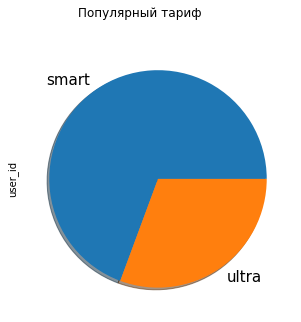

In [60]:
#визуализируем каким тарифом пользуется большинство клиентов
axes = full_table.groupby('tariff')['user_id'].count().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True,
                                                                     title = 'Популярный тариф', pctdistance=0.45,
                                                                     figsize=(20,5))

Видим, что примерно 70% пользуются тарифом Смарт.

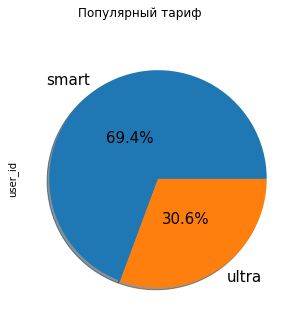

In [61]:
# код ревьювера
axes = full_table.groupby('tariff')['user_id'].count().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True,
                                                                     title = 'Популярный тариф', pctdistance=0.45,
                                                                     figsize=(20,5), autopct='%1.1f%%')

# Шаг 3. Анализируем данные

Опишем поведение клиентов оператора, исходя из выборки.

In [62]:
values = ['minutes', 'messages', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']

In [63]:
# Сделаем сводную таблицу по тарифам в разрезе месяцев
tariff_monthly_need = full_table.pivot_table(
    index=['tariff', 'month'],
    values=values
)

Тариф смарт

In [64]:
smart_monthly_need = tariff_monthly_need.loc['smart']
smart_monthly_need

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,8524.441176,18.235294,203.852941,171.323529,721.323529
2,11611.396552,24.086207,298.689655,277.603448,827.603448
3,15123.857143,31.857143,390.051948,614.623377,1164.623377
4,13479.482143,30.741071,367.133929,413.089286,963.089286
5,15825.198582,33.773050,387.361702,654.602837,1204.602837
6,15814.768293,33.402439,395.640244,658.896341,1208.896341
7,15763.512438,33.751244,408.353234,678.925373,1228.925373
8,16632.174468,33.638298,421.468085,779.106383,1329.106383
9,16324.526923,33.638462,428.611538,705.330769,1255.330769


Тариф ультра

In [65]:
ultra_monthly_need = tariff_monthly_need.loc['ultra']
ultra_monthly_need

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,13153.555556,33.777778,428.111111,0.000000,1950.000000
2,11786.958333,21.958333,297.125000,25.000000,1975.000000
3,17551.972973,32.297297,489.648649,64.864865,2014.864865
4,16843.800000,31.563636,458.018182,51.818182,2001.818182
5,19381.194030,37.850746,510.328358,111.940299,2061.940299
6,18942.238095,41.726190,479.702381,91.071429,2041.071429
7,20514.648352,49.846154,545.791209,171.428571,2121.428571
8,19594.065421,48.439252,510.775701,133.177570,2083.177570
9,19222.208696,52.286957,539.443478,74.347826,2024.347826


### Минуты разговора, количество сообщений и объём интернет-трафика в среднем необходимые пользователям каждого тарифа в месяц

In [66]:
monthly_need_pivot = tariff_monthly_need.pivot_table(
    index='tariff',
    values=values
)
monthly_need_pivot

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
tariff,,,,,
smart,15077.690651,31.413211,386.760499,633.606692,1183.606692
ultra,18222.784561,43.714983,495.934310,97.737868,2047.737868


- Пользователи тарифа Ультра более активны, но пользователи тарифа Смарт тратят в среднем в 6,5 раз больше на дополнительные пакеты услуг.
- Оператору больше денег приносит тариф Ультра, даже с учетом того, что в основном пользователи не выходят за границы тарифных лимитов. 


### Посчитаем дисперсию и стандартное отклонение

#### Минуты разговора

In [67]:
full_table.query("tariff == 'smart'")['minutes'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: minutes, dtype: float64

In [68]:
full_table.query("tariff == 'ultra'")['minutes'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: minutes, dtype: float64

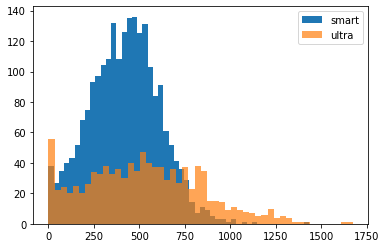

In [69]:
#построим гистограмму длительности звонков
plt.hist(full_table.query("tariff == 'smart'")['minutes'], bins=50, label='smart')
plt.hist(full_table.query("tariff == 'ultra'")['minutes'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [70]:
#рассчитаем дисперсию
smart_minutes_var = np.var(full_table.query("tariff == 'smart'")['minutes'], ddof=1)
print('Дисперсия минут разговора по тарифу смарт:', smart_minutes_var)
ultra_minutes_var = np.var(full_table.query("tariff == 'ultra'")['minutes'], ddof=1)
print('Дисперсия минут разговора по тарифу ультра:', ultra_minutes_var)

Дисперсия минут разговора по тарифу смарт: 36219.31578434428
Дисперсия минут разговора по тарифу ультра: 100873.63339730098


#### В основном, на тарифе Смарт люди разговаривают в месяц в течение 280-540 минут. Причем медиана равна 422 минуты, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит. С тарифом Ультра  иная ситуация - большая часть пользователей вообще не звонит. Из тех, кто разговаривает, в среднем наговаривают 518 минут. По итогу, медиана тарифа Ультра больше, чем медиана Смарт.

#### Количество сообщений

In [71]:
full_table.query("tariff == 'smart'")['messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [72]:
full_table.query("tariff == 'ultra'")['messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

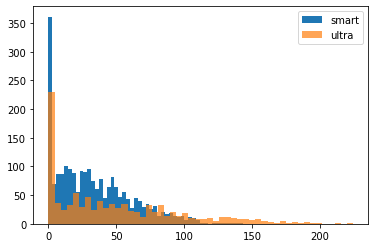

In [73]:
#построим гистограмму количества отправленных сообщений
plt.hist(full_table.query("tariff == 'smart'")['messages'], bins=50, label='smart')
plt.hist(full_table.query("tariff == 'ultra'")['messages'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [74]:
#рассчитаем дисперсию
smart_messages_var = np.var(full_table.query("tariff == 'smart'")['messages'], ddof=1)                                            
print('Дисперсия количества сообщений по тарифу смарт:', smart_messages_var)
ultra_messages_var = np.var(full_table.query("tariff == 'ultra'")['messages'], ddof=1)
print('Дисперсия количества сообщений по тарифу ультра:', ultra_messages_var)

Дисперсия количества сообщений по тарифу смарт: 796.8129584480083
Дисперсия количества сообщений по тарифу ультра: 2285.2661425446736


#### По обоим тарифам ситуация схожая - большая часть пользователей не отправляет смс. Однако, из тех, кто отправляет, большую активность проявляют пользователи тарифа Ультра - в среднем они отправляют около 50 СМС в месяц. Пользователи тарифа Смарт отправляют около 30 смс.

#### Интернет-трафик

In [75]:
full_table.query("tariff == 'smart'")['mb_used'].describe()

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

In [76]:
full_table.query("tariff == 'ultra'")['mb_used'].describe()

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

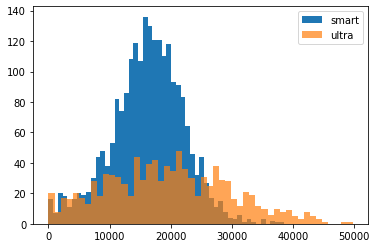

In [77]:
#построим гистограмму использования интернета
plt.hist(full_table.query("tariff == 'smart'")['mb_used'], bins=50, label='smart')
plt.hist(full_table.query("tariff == 'ultra'")['mb_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [78]:
#рассчитаем дисперсию
smart_mb_var = np.var(full_table.query("tariff == 'smart'")['mb_used'], ddof=1)                                            
print('Дисперсия трафика по тарифу смарт:', smart_mb_var)
ultra_mb_var = np.var(full_table.query("tariff == 'ultra'")['mb_used'], ddof=1)
print('Дисперсия трафика по тарифу ультра:', ultra_mb_var)

Дисперсия трафика по тарифу смарт: 34545911.12695752
Дисперсия трафика по тарифу ультра: 101935621.04821922


Построим графики распределения

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6872ff8850>,
      dtype=object)

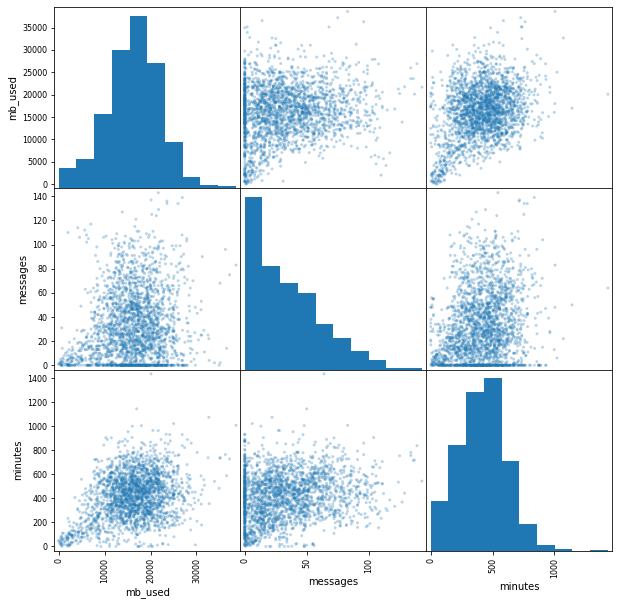

In [79]:
#для тарифа Смарт
pd.plotting.scatter_matrix(full_table.query("tariff == 'smart'")[['mb_used', 'messages', 'minutes']],
                           alpha = 0.3, figsize = (10,10))

Кол-во минут - нормальное распределение  
Кол-во сообщений - распределение Пуассона  
Кол-во мегабайт - нормальное распределение

In [ ]:
#для тарифа Ультра
pd.plotting.scatter_matrix(full_table.query("tariff == 'ultra'")[['mb_used', 'messages', 'minutes']],
                           alpha = 0.3, figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68731fd3d0>,
      dtype=object)

Кол-во минут - нормальное распределение  
Кол-во сообщений - распределение Пуассона  
Кол-во мегабайт - нормальное распределение

#### Клиенты с тарифом Смарт в среднем в месяц используют от 13 до 20 Гб трафика. Причем медиана равна 16,5 Гб, что выходит за пределы, установленные абонентской платой - в 15 Гб. Фактически, клиенты тарифа Смарт регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается. Клиенты с тарифом Ультра активней пользуются интернетом - медиана равна 19 Гб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.

##### Перед тем, как делать расчеты и строить сводные таблицы, мы могли бы избавиться от выбросов в данных, но тогда был бы риск потерять часть датасета за какой-то временной промежуток из наших выборочных совокупностей. Поэтому этот шаг мы пропустили

# Шаг 4. Проверка гипотез

###  Чтобы понять, различается ли средняя выручка пользователей разных тарифов и населенных пунктов, значима ли разница между средними значениями, проведем статистические тесты. Т.к. выборки у нас независимые и данные распределены равномерно, воспользуемся статистическим критерием Стьюдента.

#### <span style="color:blue">Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается</span>

In [ ]:
#выыедем для удобства данные
#средняя выручка по тарифу Ультра
full_table.query("tariff == 'ultra'")['rub_monthly_fee_total'].describe()

In [ ]:
#средняя выручка по тарифу Смарт
full_table.query("tariff == 'smart'")['rub_monthly_fee_total'].describe()

Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются.  
  
Нулевая гипотеза H₀:
> Средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается

Исходя из H₀ формулируется альтернативная гипотеза H₁:
>Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    full_table.query("tariff == 'smart'")['rub_monthly_fee_total'], 
    full_table.query("tariff == 'ultra'")['rub_monthly_fee_total'], equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Проверим действительно ли мы всё правильно сделали.

In [ ]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.2f}'.format(full_table.query("tariff == 'smart'")
                                                                        ['rub_monthly_fee_total'].mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {}'.format(full_table.query("tariff == 'ultra'")
                                                                     ['rub_monthly_fee_total'].mean()))

Да, всё так, верно утверждение, что средняя выручка пользователей тарифов Смарт и Ультра различается.

####  <span style="color:blue">Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</span>

Также воспользуемся методом scipy.stats.ttest_ind(array1, array2, equal_var = False). Equal_var = False, так как если считать дисперсию каждой выборки отдельно, то точность теста будет выше.  
  
  
Нулевая гипотеза H₀:
>Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Исходя из H₀ формулируется альтернативная гипотеза H₁:
>Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [ ]:
#Москва и другие регионы
moscow = full_table['city'] == 'Москва'
full_table['city'].where(moscow, 'Другой регион', inplace=True)

In [ ]:
alpha = 0.05

moscow = full_table.query("city == 'Москва'")['rub_monthly_fee_total']
other = full_table.query("city == 'Другой регион'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и регионов неодинакова, с вероятностью в почти 47% такое различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, и гипотеза не подтвердилась.

Проверим себя.

In [ ]:
print('Средняя выручка по пользователю в месяц в Москве: {:.2f}'.format(moscow.mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.2f}'.format(other.mean()))

В Москве в среднем платят на 22 руб,. больше, чем в регионах. Было бы странно, если бы разница оказалась статистически значимой.

# Шаг 5. Общий вывод

Тариф Смарт приносит около 65% всей выручки, но при этом на него приходится 2200 пользователей. Тариф Ультра дает остальные 35%, но эту выручку создают всего 1000 пользователей.
Среднему пользователю тарифа Смарт не хватает интернет-трафика, заложенного в абонентскую плату и ему приходится переплачивать за доптрафик.  
Итого, в тарифной сетке есть дешевый тариф Смарт за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита (417 мин из 500), и есть тариф Ультра, стоимостью 1950 рублей, где лимитов по всем типам связи предостаточно.

Отвечая на вопрос какой тариф лучше, мы можем сказать, что
- для пользователя выгоднее тариф смарт
- для оператора тариф ультра  

Я бы предложила оператору создать некий "средний" тариф. Дороже тарифа смарт и с лимитами меньше, чем у ультра, но больше тех, что сейчас имеются что у тарифа смарт.